In [1]:
import pandas as pd
import numpy as np
import os
import sys
import random
from itertools import product
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


sys.path.extend([
                '../src',
                '../data',
                ])

from utils import run_nested_cv_2

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("CPU")
    
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

#data
left = pd.read_csv('../data/left.csv')
right = pd.read_csv('../data/right.csv')
affected = pd.read_csv('../data/affected.csv')
unaffected = pd.read_csv('../data/unaffected.csv')

right['limb'] = 1
left['limb'] = 2
affected['limb'] = 3
unaffected['limb'] = 4

affected['subject'] = affected['subject'] + 10
unaffected['subject'] = unaffected['subject'] + 10

combined = pd.concat([unaffected, 
                      affected, 
                      right, 
                      left], ignore_index=True)

architecture = {
               'num_filters': [50, 25],
               'filter_sizes': [5, 5],
               'pool_sizes': [5, 5]
               }

CPU


2025-07-08 09:05:42.752259: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


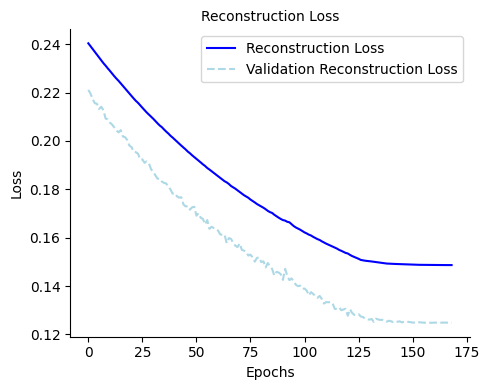

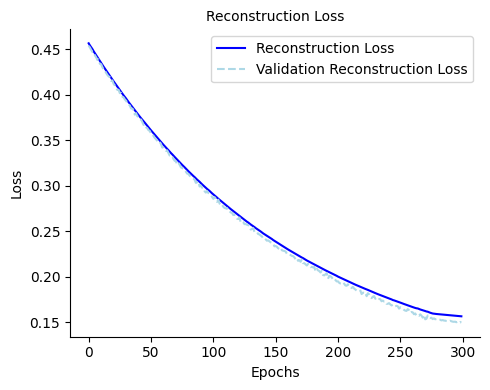

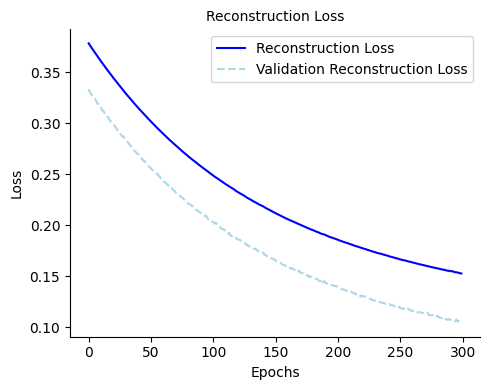

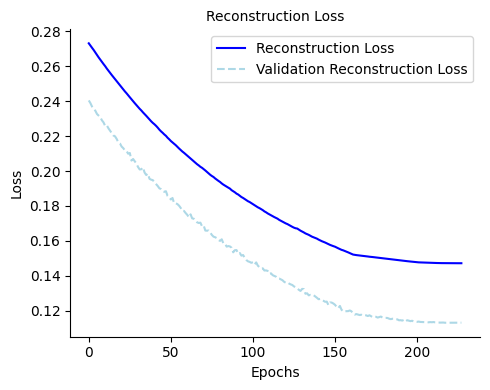

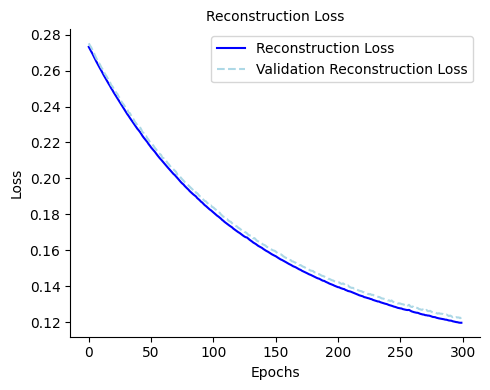

In [ ]:
approach = 2
filename = f'../results/approach2/limb_nested_cv_aff.csv'

window_size = 100
epochs = 300
batch_size = 32

X = affected[['ax', 'ay', 'az']]
y = affected['gnd']
subjects = affected['subject']
limbs = affected['limb']


hp_grid = {'activation': ['relu', 'tanh'],
           'kernel_init': [tf.keras.initializers.HeNormal(seed=42),],     
           'bias_init': [tf.keras.initializers.Zeros()],
           'optimizer': ['adam'],
           'loss': [tf.keras.losses.mean_squared_error,
                    tf.keras.losses.mean_absolute_error],    
           'learning_rate': [0.0001],
           'batch_norm': [True, False]}

class_loss = False
plot_hist = True

results_df = run_nested_cv_2(window_size=window_size,
                            X=X,
                            y=y,
                            subjects=subjects,
                            limbs=limbs,
                            architecture=architecture,
                            hp_grid=hp_grid,
                            epochs=epochs,
                            batch_size=batch_size,
                            class_loss=class_loss,
                            plot_hist=plot_hist,
                            error_func=None)